<a href="https://colab.research.google.com/github/jp7252/ML4RM/blob/main/Class_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine (SVM)

- Support vector machines (SVMs) are supervised learning methods used for classification analysis.

- Unlike linear discriminant analysis or logistic regression, SVMs approach the two-class classification problem in a direct way: construct linear decision boundaries, by explicitly separating the data in two different classes as well as possible.

- The decision boundaries are called hyperplanes in the feature space.

### Hyperplanes

A hyperplane of a *p-dimensional* space *V* is a subspace of dimension *p-1*.

- A hyperplane can be described with a single linear equation of the form (in Cartesian coordinates):

$$\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$$

  - It is more convenient to be written in the matrix form $\beta_0 + \beta^T X = 0$, where $\beta = (\beta_1, ... \beta_p)$ and $X = (X_1, ... X_p)$ are *p-dimensional* vectors.
  
  - In a 2-dimensional space, a hyperplane is a line and in a 3-dimensional space it is a plane.


- The coefficient vector $\beta$ is the **normal vector** - a vector orthogonal to the surface of that hyperplane.

- In some cases we need to work with the normalized form: $\beta^* = \beta / \lvert \beta \rvert$, or equivalently, to require that $\sum_i^p \beta_i^2 = 1$

- **Why are we interested in the normal vector?**
    - Once the normal vector is found, we know where the hyperplane is.


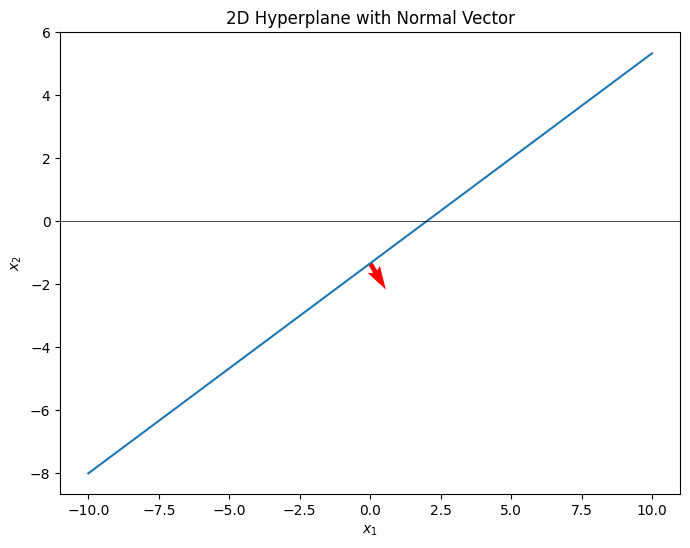

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the hyperplane
beta0 = -4
beta1 = 2
beta2 = -3

# Define the range for x1
x1_min, x1_max = -10, 10
x1 = np.linspace(x1_min, x1_max, 100)

# Calculate x2 from the hyperplane equation beta0 + beta1*x1 + beta2*x2 = 0
x2 = - (beta0 + beta1 * x1) / beta2

# Define the normal vector
normal_vector = np.array([beta1, beta2])

# Plot the hyperplane
plt.figure(figsize=(8, 6))
plt.plot(x1, x2, label=r'$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$')

# Plot the normal vector
# Choose a point on the hyperplane (e.g., x1=0, solve for x2)
x1_point = 0
x2_point = -beta0 / beta2

# Normalize the normal vector for better visualization
normal_vector_length = np.linalg.norm(normal_vector)
normal_vector_normalized = normal_vector / normal_vector_length

# Calculate the end point of the normal vector
x1_normal_end = x1_point + normal_vector_normalized[0]
x2_normal_end = x2_point + normal_vector_normalized[1]

# Plot the normal vector
plt.quiver(x1_point, x2_point,
           normal_vector_normalized[0], normal_vector_normalized[1],
           angles='xy', scale_units='xy', scale=1, color='red', label='Normal Vector')

# Adding labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2D Hyperplane with Normal Vector')
plt.axhline(0, color='black', linewidth=0.5)

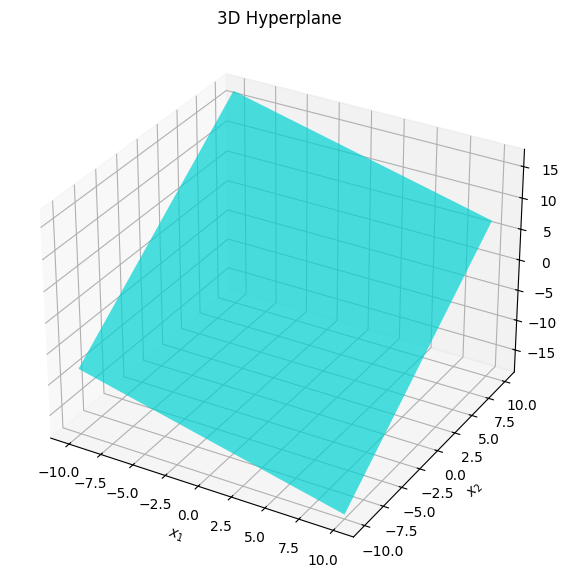

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coefficients of the hyperplane
beta0 = 2
beta1 = 2
beta2 = -5
beta3 = 4

# Define the range for x1 and x2
x1_min, x1_max = -10, 10
x2_min, x2_max = -10, 10

# Create a grid of x1 and x2 values
x1 = np.linspace(x1_min, x1_max, 100)
x2 = np.linspace(x2_min, x2_max, 100)
x1, x2 = np.meshgrid(x1, x2)

# Calculate x3 from the hyperplane equation beta0 + beta1*x1 + beta2*x2 + beta3*x3 = 0
# Rearranged to x3 = - (beta0 + beta1*x1 + beta2*x2) / beta3
x3 = - (beta0 + beta1 * x1 + beta2 * x2) / beta3

# Plot the hyperplane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x1, x2, x3, alpha=0.7, rstride=100, cstride=100, color='cyan')

# Adding labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('3D Hyperplane')

plt.show()

### Separating Hyperplanes

- If we assume that the data can be well separated by a hyperplane defined by $f(X) = \beta_0 + \beta^T X = 0$, then:

  - $f(X) > 0$, for points on one side of the hyperplane,
  - $f(X) < 0$, for points on the other side.

- We coded the two classes as:

  - $y = 1$, for $f(X) > 0$
  - $y = -1$, for $f(X) < 0$

- The distances times the classes become positive: $y_i \cdot f(X_i) > 0$

### Optimal Separating Hyperplanes

- Goal: to maximize the margin, defined by the distance from the data point to a hyperplane,  between the two classes on the training data.

- The data points that are used to determine the margins are called **support vectors**.


### The Support Vector Classifier

- To tolerate noise and errors, we still maximize M but meanwhile allow some points to be on the wrong side of the hyperplane.

- We introduce “slack” variables $\epsilon = (\epsilon_1, ... \epsilon_N)$ with $\epsilon_i \geq 0$ and $\sum_i \epsilon_i \leq \mbox{Const}$, and modify the optimization problem to be:

$$
\underset{\beta_0, \epsilon, \lvert \beta \rvert = 1}{\mathrm{max}} M
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq M (1 - \epsilon_i)
\\
\epsilon_i \geq 0 \mbox{, and } \sum_i \epsilon_i \leq \mbox{Const}
\end{cases}
$$

- $\epsilon_i$ are proportional to the amount by which the prediction is on the wrong side of their margin.
- Misclassifications occur when $\epsilon_i > 1$. So given that the constraint $\sum \epsilon_i = \mbox{Const}$, the total number of misclassifications will be bounded by $\mbox{Const}$.

- The effect of the data points that fall into the margin will be penalized by the slack variable $\epsilon$.


Computationally it's convenient to use the form:

$$
\underset{\beta_0, \beta}{\mathrm{min}} \big( \frac{1}{2} \lvert \beta \rvert^2 + C \sum_{i=1}^N \epsilon_i \big)
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq 1 - \epsilon_i
\\
\epsilon_i \geq 0
\end{cases}
$$

where $C$ is the penalty parameter of the error term.

- If $C$ is close to 0 then we have a wide, soft margin.

- If $C$ is large then we are close to the hard-margin formulation.


- Let's see the SVC in action with the Iris dataset.

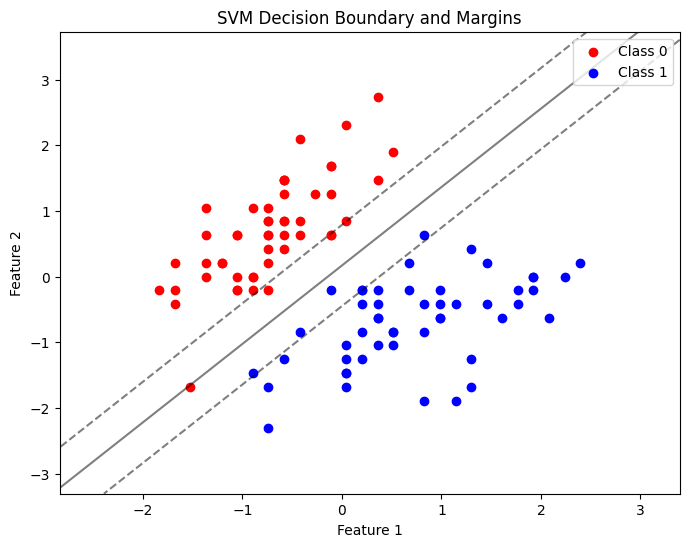

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We use only the first two features for easy visualization
y = iris.target

# For simplicity, we select only two classes (e.g., class 0 and class 1)
X = X[y != 2]
y = y[y != 2]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create and fit the SVM model
clf = SVC(kernel='linear', C=1.0)  # Linear kernel, regularization parameter C
clf.fit(X, y)

# Plotting the decision boundary
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Margins')
plt.legend()
plt.show()

In [ ]:
## There are ten support vectors in each class.

support = clf.support_vectors_ # value of support vector
print(support)

[[-0.11120129  0.63190269]
 [-0.73768744 -0.2078351 ]
 [-0.11120129  0.63190269]
 [ 0.04542025  0.84183714]
 [-1.52079513 -1.67737625]
 [-0.89430898 -1.4674418 ]
 [-0.42444437 -0.83763845]
 [-0.11120129 -0.2078351 ]
 [ 0.82852793  0.63190269]
 [ 0.20204178 -0.2078351 ]]


### Beyond Linearity

- The support vector classifier described so far finds linear boundaries in the feature space. In reality, it's very unlikely that the true boundary is actually linear in $X$.

- If a linear boundary fails, we need to move beyond linearity. The core idea is to enlarge the features $X$ using basis expansions such as polynomials, and then use linear models in the enlarged space of derived input features, and translate to nonlinear boundaries in the original space.

- **Examples**
 - We enlarge the feature space $(X_1, X_2)$ to $(X_1, X_2, X_1^2, X_2^2, X_1X_2)$
 - The boundary is then a hyperplane in *5-dimensional* space determined by:
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2, + \beta_3 X_1^2 + \beta_4 X_1 X_2 + \beta_4 X_2^2 = 0
$$



### Dense Neural Networks

- In this lecture, we will start with the basic structure of fully connected neural network and walk you through the forward and back propgation. We will talk about activation function, loss function and chain rule along the way.
- We will implement a logistic regression using neural network from scratch.

### Main research domain of Deep Learning

- Computer Vision
 - Image Classification
 - Object Detection
 - Semantic Segmentation
 - GAN: Generative Adversarial Network
- Natural Language Processing
 - Machine Translation (Alexa, Google Assistant)
 - Question Answering - ChatGPT, Claude, Mistral
 - [Github Copilot](https://copilot.github.com/)
- Game AI
 - Reinforcement Learning
 - AlphaGo and AlphaZero from Deep Mind


### Useful Resources

- Framework: Tensorflow/JAX (Google), Pytorch (Facebook)
- Top conferences like CVPR, ICLR, NeurIPS, ICML, etc.
- [Papers with Code](https://paperswithcode.com/): find the implementation of papers in either Tensorflow or Pytorch.
- Platform: [Google Colab](https://colab.research.google.com/signup), [Paperspace](https://www.paperspace.com/) and [Kaggle](https://www.kaggle.com/docs/efficient-gpu-usage) (30 hrs/week).
- Sidenote: Colab will disconnect if the browser stays idle for some time. You have to reconnect and run all the code chunks again.
  - You can only run **one** session simultaneously.


### Connect Colab with Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

### What is Neural Network

- Let's try it out in an interactive dashboard. https://playground.tensorflow.org/
- A more advanced version: https://deeperplayground.org/

### Basic Structure - Fully Connected Neural Network



![img](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)

[Source](https://cs231n.github.io/convolutional-networks/)

### Forward Propagation



<center>
<img src="https://nycdsaslides.s3.amazonaws.com/forward_propagation.jpg" width="500"/>
</center>

$$
X = \begin{bmatrix}
1 \\
2
\end{bmatrix}
W_1 =
\begin{bmatrix}
-1 & 1 \\
2  & 2 \\
0  & 3
\end{bmatrix}
W_2 =
\begin{bmatrix}
3 & 1 & 2
\end{bmatrix}
$$

- **Quick matrix multiplication reminder**: Multiplying matrices of shape `(a, b)` and `(b, c)` will result in a shape of `(a, c)` matix.
- We ignored the bias here for simplification but it should be $WX + b$ in most cases.
- We also used identity as the activation function for illustration purpose. We need a **non-linear activation function** in neural network because otherwise, you can always find another matrix that gives you the same result as the two matrices. $C(AX + B) + D = CAX + CB +D$
- **The weights are what we are trying to learn in a neural network**

###Activation function

**Sigmod**
- Sigmoid was traditionally used as the activitation function $\delta(x) = {\frac  {1}{1+e^{-x}}}$
- Mostly only used at the output layer now for binary classification problem

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png" width="400"/>

**ReLU - Rectified Linear Unit**
- The most commonly used activitation function
$ReLU(x) = max(0, x)$
- The gradient is zero for negative numbers - Dying node


<img src="https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png"/>

### Loss Function
- Once we have the output of the neural network, we need to calculate the loss/cost function based on the type of the problem. Just like all the machine learning algorithm, we will find the best parameter (a.k.a. weights in neural network) during the process of optimization.
- **Binary Classification: Log Loss / Binary Cross-Entropy**:
$$
LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N [y_i \cdot log_e(\hat{y_i}) + (1-y_i) \cdot log_e(1-\hat{y_i}) ]
$$
- **Multi-Class Classification**: Categorical Cross-Entropy
- **Regression**: RMSE

### How do we find the weights of the matrix?
- We randomly initialized the weights using small values from gaussian distribution with zero mean.
- Update the weights through **back propagation** using the gradients calculated from the output layer and propagate all the way to the input layer.

### Back Propagation


- Minimize the loss function by traversing the network from the the final layer ($\hat{y_i}$) to the input layer.

- **Chain Rule**: if a variable z depends on the variable y, which itself depends on the variable x (i.e., y and z are dependent variables), then z, via the intermediate variable of y, depends on x as well. In which case, the chain rule states that: ${\frac  {dz}{dx}}={\frac  {dz}{dy}}\cdot {\frac  {dy}{dx}}$
- If our neural network has multiple hidden layers, we will keep propagating through the layers backward and multiply the local gradient with the graident from the upper layer (chain rule).
- Once we have the gradient for each weight, we can multiply gradient by a learning rate $\sigma$ and substract it from the original weight
  - $w^{'} = w - \sigma\cdot dw$
  - $b^{'} = b - \sigma\cdot db$

###Computational Graph

<img src="https://nycdsaslides.s3.amazonaws.com/computation_graph.jpg"/>

- With one forward propagation and one back propagation, we finished so called one **epoch**.
- **epoch** is just ML jargon for "one pass through your data during training".

### Exercise: Logistic Regression using Gradient Descent

- Generate a toy dataset

In [ ]:
import numpy as np
pos_X = 1 + .25*np.random.randn(100)
neg_X = 0 + .25*np.random.randn(100)
X = np.array([np.concatenate([pos_X, neg_X]), 0 + .1*np.random.randn(200)])
y = np.concatenate([np.ones(100,dtype=int),np.zeros(100,dtype=int)])

- Create a plotting function

In [ ]:
import matplotlib.pyplot as plt
def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r","g","b","m","c","k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])

    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([min(x[:,0])-del_0, max(x[:,0])+del_0, \
              min(x[:,1])-del_1, max(x[:,1])+del_1])

data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")

Preprocess the data

- If the input variables are combined linearly, then it is rarely strictly necessary to standardize the inputs, at least in theory. The reason is that any rescaling of an input vector can be effectively undone by changing the corresponding weights and biases, leaving you with the exact same outputs as you had before. However, there are a variety of practical reasons why standardizing the inputs can make training faster and reduce the chances of getting stuck in local optima.
- When features are of different scale ($x_1=0-1$ and $x_2=0\cdots1000$), the error function surface may become elongated, meaning that different scales for different dims ($w1$, $w2$). But learning rate is the **SAME** for all dims --> steps in elongated dim ($w2$) are very small until reaches the local min.
- $x = x - \mu$ (centers mean around zero)
- $x = {x}/{\sigma}$ (gives unit variance)


In [ ]:
x_mean = np.mean(X, axis=1)
X[0] = X[0] - x_mean[0]
X[1] = X[1] - x_mean[1]
x_std = np.std(X, axis=1)
X[0] = X[0] / x_std[0]
X[1] = X[1] / x_std[1]

data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")

In [ ]:
X.shape

Step 1: Create the computational graph with sigmoid and log loss (on paper)
- Logistic regression is just $z = WX + b$ and pass the result to the sigmod function where $\delta(z) = {\frac  {1}{1+e^{-z}}} = \hat{y}$
- Then we pass the output to the loss function and calculate the log loss using: $$
LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N [y_i \cdot log_e(\hat{y_i}) + (1-y_i) \cdot log_e(1-\hat{y_i}) ]
$$
- Pay attention to the dimension when translate the computational graph to code

Step 2: Write code for prediction and compute the loss

In [ ]:
def initialize(x):
  # function that initialize the weights of the matrix based on the shape of input X
  w = .1*np.random.randn(x.shape[0])
  b = 0
  return w,b

In [ ]:
def predict(X,w,b):
  # forward propagation z = Wx +b
  # return y_hat = sigmoid(z)



In [ ]:
def compute_loss(X,w,b,y):
  # calculate the log loss using y_hat and y


Step 3: Calculate the derivatives and update rules for the weights and bias (on paper)
- Useful tips when calculate the gradient
 - ${\frac  {d\delta}{dx}} = \delta(x)\cdot(1-\delta(x))$ where $\delta(x) = {\frac  {1}{1+e^{-x}}}$
 - ${\frac  {dlog(x)}{dx}} = {\frac {1}{x}}$
 - If you forgot the deriative of a function, look it up [here](https://www.mathcentre.ac.uk/resources/Engineering%20maths%20first%20aid%20kit/latexsource%20and%20diagrams/8_2.pdf).


Step 4: Write code for the backward pass

In [ ]:
def backprop(X,w,b,y,lr):
  """
    Step 1: Calculate the loss using compute_loss
    Step 2: Find the dL/dw and dL/db
    Step 3: Update w, b based on the learning rate and return them for the next epoch
  """


Plotting Function:

In [ ]:
def decision_boundary(X,w,b):
    intercept = -b/w[1]
    slope = -w[0]/w[1]
    x_endpoints = np.array([min(X.T[:,0] - (max(X.T[:,0]) - min(X.T[:,0]))*.1), max(X.T[:,0]) + (max(X.T[:,0]) - min(X.T[:,0]))*.1])
    y_endpoints = slope*x_endpoints + intercept
    plt.plot(x_endpoints, y_endpoints, 'k', lw=2, ls='--')
    plt.show()


Test your code:

In [ ]:
#initialize weights
w,b = initialize(X)

#set epochs
epochs = 10

#set learning rate
learning_rate = .5

In [ ]:
#Run model for epochs
data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")
decision_boundary(X,w,b)
for i in range(epochs):
    w,b = backprop(X,w,b,y,learning_rate)
    data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")
    decision_boundary(X,w,b)

### Exercise Solution

Step 1: Create the computational graph with sigmoid and log loss (on paper)
- Logistic regression is just $z = WX + b$ and pass the result to the sigmod function where $\delta(z) = {\frac  {1}{1+e^{-z}}} = \hat{y}$
- Then we pass the output to the loss function and calculate the log loss using: $$
LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N [y_i \cdot log_e(\hat{y_i}) + (1-y_i) \cdot log_e(1-\hat{y_i}) ]
$$
- Pay attention to the dimension when translate the computational graph to code

Step 2: Write code for prediction and compute the loss

In [ ]:
def initialize(x):
  # function that initialize the weights of the matrix based on the shape of input X
  w = .1*np.random.randn(x.shape[0])
  b = 0
  return w,b

In [ ]:
def predict(X,w,b):
  # forward propagation z = Wx +b
  # return y_hat = sigmoid(z)
  z = np.matmul(w,X) + b
  return 1/(1 + np.exp(-z))


In [ ]:
def compute_loss(X,w,b,y):
  # calculate the log loss using y_hat and y
  y_hat = predict(X,w,b)
  loss = np.sum(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/y_hat.shape[0]
  print("Loss: ",loss)
  return y_hat, loss

Step 3: Calculate the derivatives and update rules for the weights and bias (on paper)
- Useful tips when calculate the gradient
 - ${\frac  {d\delta}{dx}} = \delta(x)\cdot(1-\delta(x))$ where $\delta(x) = {\frac  {1}{1+e^{-x}}}$
 - ${\frac  {dlog(x)}{dx}} = {\frac {1}{x}}$
 - If you forgot the deriative of a function, look it up [here](https://www.mathcentre.ac.uk/resources/Engineering%20maths%20first%20aid%20kit/latexsource%20and%20diagrams/8_2.pdf).


Step 4: Write code for the backward pass

In [ ]:
def backprop(X,w,b,y,lr):
  """
    Step 1: Calculate the loss using compute_loss
    Step 2: Find the dL/dw and dL/db
    Step 3: Update w, b and return them for the next epoch
  """

  #forward_pass
  y_hat, loss = compute_loss(X,w,b,y)

  #dL/dw and dL/db
  dw = np.dot(X, (y_hat - y).T)/y.shape[0]
  db =  np.sum(y_hat - y)/y.shape[0]

  #weight updates
  w = w - lr*dw
  b = b - lr*db

  return w,b

Plotting Function:

In [ ]:
def decision_boundary(X,w,b):
    intercept = -b/w[1]
    slope = -w[0]/w[1]
    x_endpoints = np.array([min(X.T[:,0] - (max(X.T[:,0]) - min(X.T[:,0]))*.1), max(X.T[:,0]) + (max(X.T[:,0]) - min(X.T[:,0]))*.1])
    y_endpoints = slope*x_endpoints + intercept
    plt.plot(x_endpoints, y_endpoints, 'k', lw=2, ls='--')
    plt.show()


Test your code:

In [ ]:
#initialize weights
w,b = initialize(X)

#set epochs
epochs = 10

#set learning rate
learning_rate = .5

In [ ]:
#Run model for epochs
data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")
decision_boundary(X,w,b)
for i in range(epochs):
    w,b = backprop(X,w,b,y,learning_rate)
    data_2Dplot(X.T, y,legends=["Class 1", "Class 2"], xlabel="Feature_1", ylabel="Feature_2")
    decision_boundary(X,w,b)